Scrapping

In [ ]:
import pandas as pd

# Ganti dengan path file Anda
file_path = "playstore_reviews_flip_id.flip_20250421_074848.csv"

# Membaca data
try:
    df = pd.read_csv(file_path)
    print(f"Berhasil memuat {len(df)} ulasan")

    # Tampilkan 5 baris pertama
    print("\nPreview data:")
    print(df.head())

except FileNotFoundError:
    print("File tidak ditemukan, pastikan path benar")
except Exception as e:
    print(f"Error: {str(e)}")

File tidak ditemukan, pastikan path benar


In [1]:
!pip install google_play_scraper

  Using cached google_play_scraper-1.2.7-py3-none-any.whl.metadata (50 kB)


In [ ]:
from google_play_scraper import reviews, Sort
import pandas as pd
from datetime import datetime

# Konfigurasi
app_id = 'com.gojek.app'  # ID aplikasi Flip
limit = 2000  # Jumlah maksimal ulasan yang diambil
reviews_2025 = []

print(f"Memulai scraping ulasan Flip (2025)...")

# Scraping dengan filter tanggal
continuation_token = None
while len(reviews_2025) < limit:
    result, continuation_token = reviews(
        app_id,
        lang='id',          # Bahasa Indonesia
        country='id',       # Negara Indonesia
        sort=Sort.NEWEST,   # Ulasan terbaru pertama
        count=100,          # 100 ulasan per request
        continuation_token=continuation_token
    )

    # Filter hanya ulasan tahun 2025
    for review in result:
        review_date = review['at'].date()
        if review_date.year == 2025:
            reviews_2025.append(review)
        elif review_date.year < 2025:  # Hentikan jika sudah melewati 2025
            break

    if continuation_token is None or len(reviews_2025) >= limit:
        break

    print(f"Progress: {len(reviews_2025)} ulasan 2025 terkumpul")

# Konversi ke DataFrame
df = pd.DataFrame(reviews_2025)
print(f"\nTotal ulasan 2025: {len(df)}")

# Simpan ke CSV
filename = f"reviews_gojek_2025_{datetime.now().strftime('%Y%m%d')}.csv"
df.to_csv(filename, index=False)
print(f"Data disimpan sebagai {filename}")

Memulai scraping ulasan Flip (2025)...
Progress: 100 ulasan 2025 terkumpul
Progress: 200 ulasan 2025 terkumpul
Progress: 300 ulasan 2025 terkumpul
Progress: 400 ulasan 2025 terkumpul
Progress: 500 ulasan 2025 terkumpul
Progress: 600 ulasan 2025 terkumpul
Progress: 700 ulasan 2025 terkumpul
Progress: 800 ulasan 2025 terkumpul
Progress: 900 ulasan 2025 terkumpul
Progress: 1000 ulasan 2025 terkumpul
Progress: 1100 ulasan 2025 terkumpul
Progress: 1200 ulasan 2025 terkumpul
Progress: 1300 ulasan 2025 terkumpul
Progress: 1400 ulasan 2025 terkumpul
Progress: 1500 ulasan 2025 terkumpul
Progress: 1600 ulasan 2025 terkumpul
Progress: 1700 ulasan 2025 terkumpul
Progress: 1800 ulasan 2025 terkumpul
Progress: 1900 ulasan 2025 terkumpul

Total ulasan 2025: 2000
Data disimpan sebagai reviews_gojek_2025_20250428.csv


In [ ]:
!git clone https://github.com/ezaaputra/indonlu.git
!pip install emoji
!pip install transformers

Cloning into 'indonlu'...


   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/590.6 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/590.6 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/590.6 kB ? eta -:--:--
   --------------------------------- ---- 524.3/590.6 kB 342.2 kB/s eta 0:00:01
   --------------------------------- ---- 524.3/590.6 kB 342.2 kB/s eta 0:00:01
   -------------------------------------- 590.6/590.6 kB 318.6 kB/s eta 0:00:00
  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
  Using cached huggingface_hub-0.30.2-py3-none-any.whl.metadata (13 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Using cached PyYAML-6.0.2-cp39-cp39-win_amd64.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import os

In [4]:

import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from collections import defaultdict

# NLP
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import emoji

# Viz
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#Model IndoBERT
import random
import torch
import torch.nn.functional as F
from torch import optim
from tqdm import tqdm

from transformers import BertForSequenceClassification, BertConfig, BertTokenizer
from indonlu.utils.data_utils import DocumentSentimentDataset, DocumentSentimentDataLoader
from indonlu.utils.forward_fn import forward_sequence_classification
from indonlu.utils.metrics import document_sentiment_metrics_fn

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
# Define the path to your dataset
dataset_path = '/content/drive/MyDrive/S2/NLP/dataset/reviews_flip_2025_20250421_label.csv'

# Load the dataset
df = pd.read_csv(dataset_path)

# ***analys data***

Unique categories: ['Positive' 'Negative' 'Neutral']
Value counts:
 category
Positive    1446
Negative     460
Neutral       94
Name: count, dtype: int64


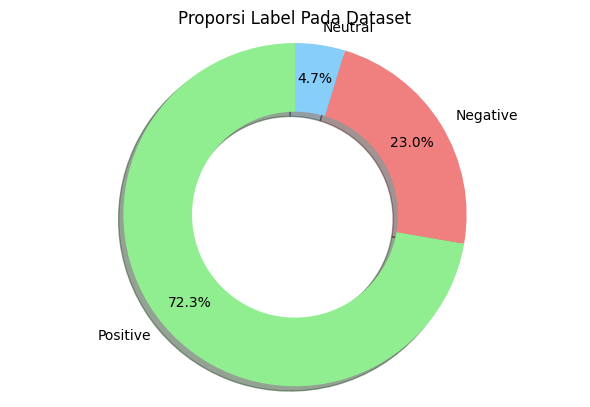

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file (assuming it's comma separated)
kamus_alay_path = '/content/drive/MyDrive/S2/NLP/dataset/kamus_alay.csv'

# Check the unique categories in your data
print("Unique categories:", df['category'].unique())
print("Value counts:\n", df['category'].value_counts())

# Function to make a donut chart
def donut(sizes, ax, angle=90, labels=None, colors=None, explode=None, shadow=None):
    # Plot
    ax.pie(sizes, colors=colors, labels=labels, autopct='%.1f%%',
           startangle=angle, pctdistance=0.8, explode=explode,
           wedgeprops=dict(width=0.4), shadow=shadow)
    # Formatting
    plt.axis('equal')
    plt.tight_layout()

# Get value counts
value_counts = df['category'].value_counts()

# Create labels and colors based on actual categories
labels = value_counts.index.tolist()
colors = ['lightgreen' if cat == 'Positive' else
          'lightskyblue' if cat == 'Neutral' else
          'lightcoral' for cat in labels]

# Create axes
f, ax = plt.subplots(figsize=(6,4))

# Plot donut
donut(value_counts, ax, 90, labels, colors=colors, explode=(0,0,0), shadow=True)
ax.set_title('Proporsi Label Pada Dataset')

plt.show()

cleaning data

Proses case folding dan data cleaning dapat dilihat pada script berikut

In [7]:
def clean_review(text):
    """Clean and normalize review text"""
    if not isinstance(text, str):
        return np.nan

    # Convert to lowercase
    text = text.lower()

    # Remove newlines and tabs
    text = re.sub(r'[\n\t]', ' ', text)

    # Remove emojis
    text = emoji.demojize(text)
    text = re.sub(r':[A-Za-z_-]+:', ' ', text)

    # Remove emoticons
    text = re.sub(r"([xX;:]'?[dDpPvVoO3)(])", ' ', text)

    # Remove URLs - FIXED REGEX PATTERN
    text = re.sub(
        r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|"
        r"www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|"
        r"https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|"
        r"www\.[a-zA-Z0-9]+\.[^\s]{2,})",
        " ", text
    )

    # Remove usernames and hashtags
    text = re.sub(r"@[^\s]+[\s]?", ' ', text)
    text = re.sub(r'#(\S+)', r'\1', text)

    # Keep only letters and basic punctuation
    text = re.sub(r'[^a-zA-Z,.?!]', ' ', text)

    # Remove repeated characters
    text = repeatchar_clean(text)

    # Normalize whitespace
    text = re.sub(r'[ ]+', ' ', text).strip()

    return text if text else np.nan

In [8]:
character = ['.',',',';',':','-,','...','?','!','(',')','[',']','{','}','<','>','"','/','\'','#','-','@',
             'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',
             'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

# hapus karakter yang berulang
def repeatcharClean(text):
  for i in range(len(character)):
    charac_long = 5
    while charac_long > 2:
      char = character[i]*charac_long
      text = text.replace(char,character[i])
      charac_long -= 1
  return text

def clean_review(text):
  # ubah text menjadi huruf kecil
  text = text.lower()
  # ubah enter menjadi spasi
  text = re.sub(r'\n', ' ', text)
  # hapus emoji
  text = emoji.demojize(text)
  text = re.sub(':[A-Za-z_-]+:', ' ', text) # delete emoji
  # hapus emoticon
  text = re.sub(r"([xX;:]'?[dDpPvVoO3)(])", ' ', text)
  # hapus link
  text = re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})", "", text)
  # hapus usename
  text = re.sub(r"@[^\s]+[\s]?", ' ', text)
  # hapus hashtag
  text = re.sub(r'#(\S+)', r'\1', text)
  # hapus angka dan beberapa simbol
  text = re.sub('[^a-zA-Z,.?!]+',' ',text)
  # hapus karakter berulang
  text = repeatcharClean(text)
  # clear spasi
  text = re.sub('[ ]+',' ',text)
  return text

def preprocess_v1(df):
  df_pp = df.copy()
  df_pp['review_text'] = df_pp['review_text'].map(clean_review)

  # delete empty row
  df_pp['review_text'] = df_pp['review_text'].replace('', np.nan)
  df_pp['review_text'] = df_pp['review_text'].replace(' ', np.nan)
  df_pp.dropna(subset=['review_text'], inplace=True)

  return df_pp

df_v1 = preprocess_v1(df)


In [9]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
import pandas as pd
import numpy as np
import re
import emoji
from nltk.tokenize import word_tokenize

# load kamus alay
kamus_alay = pd.read_csv(kamus_alay_path)

# buat dictionary dari kamus alay
normalize_word_dict = dict(zip(kamus_alay['slang'], kamus_alay['formal']))

# fungsi untuk normalisasi teks
def normalize_review(text):
    # tokenize kata per kata
    list_text = word_tokenize(text)
    # ubah bahasa alay
    list_text = [normalize_word_dict.get(term, term) for term in list_text]
    # gabung kembali
    text = " ".join(list_text)
    return text

# fungsi preprocessing
def preprocess_v2(df):
    df_pp = df.copy()
    df_pp['review_text'] = df_pp['review_text'].map(normalize_review)

    # hapus baris kosong
    df_pp['review_text'] = df_pp['review_text'].replace(['', ' '], np.nan)
    df_pp.dropna(subset=['review_text'], inplace=True)
    return df_pp

# pakai fungsi preprocess
df_v2 = preprocess_v2(df)
print(df_v2)


                                  reviewId           userName  \
0     2c0001ec-9b8b-4c42-8b1d-f3dcf5d09dd1             Ariadi   
1     624fee26-ec89-4b9a-a5eb-05e723d15a5c  agung margiansyah   
2     2e970733-af79-4a19-bf8a-7b23ec139014    lapolay kusnadi   
3     65719b48-437a-43c3-acaa-8b908c2f2ad9       jangkung pea   
4     f160f886-0650-4424-92a0-9c078ade509c    Siti Windaryati   
...                                    ...                ...   
1995  5dc7d718-c597-4d9b-a7fc-f349be638e08     Fajar Kurniadi   
1996  c53159e3-0026-4df3-8c6f-f80f47af4de8        Hendra Saja   
1997  d9d2f268-4b8e-46a3-b475-dddada8ea1bb       Ana Marliana   
1998  fe9d6e3f-c6c5-40a0-98e9-de4bfec03a0b        Andri Yasin   
1999  4cc5e968-d4be-4edf-9f66-66a7c415ba3a   Puguh Purwandaru   

                                              userImage  \
0     https://play-lh.googleusercontent.com/a-/ALV-U...   
1     https://play-lh.googleusercontent.com/a-/ALV-U...   
2     https://play-lh.googleusercontent.co

In [11]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize

# Load slang dictionary more efficiently
kamus_alay = pd.read_csv(kamus_alay_path)
normalize_word_dict = kamus_alay.set_index('slang')[['formal']].to_dict()['formal']

def normalize_review(text):
    """Normalize slang words in review text"""
    if not isinstance(text, str) or not text.strip():
        return np.nan

    try:
        # Tokenize and normalize
        tokens = word_tokenize(text)
        normalized_tokens = [
            normalize_word_dict.get(term.lower(), term)  # Case-insensitive lookup
            for term in tokens
        ]
        # Rejoin and clean
        normalized_text = " ".join(normalized_tokens).strip()
        return normalized_text if normalized_text else np.nan
    except Exception as e:
        print(f"Error processing text: {text[:50]}... Error: {str(e)}")
        return np.nan

def preprocess_v2(df, text_column='review_text'):
    """
    Preprocess DataFrame by normalizing slang words

    Args:
        df: Input DataFrame
        text_column: Name of the column containing text to normalize

    Returns:
        Processed DataFrame with normalized text
    """
    df_pp = df.copy()

    # Apply normalization safely
    df_pp[text_column] = df_pp[text_column].astype(str).apply(normalize_review)

    # Remove empty rows more efficiently
    df_pp = df_pp[df_pp[text_column].notna() & (df_pp[text_column].str.strip() != '')]

    # Reset index
    df_pp.reset_index(drop=True, inplace=True)

    return df_pp

# Usage with progress bar for large datasets
from tqdm import tqdm
tqdm.pandas()

df_v2 = preprocess_v2(df_v1)
print(df_v2)

                                  reviewId           userName  \
0     2c0001ec-9b8b-4c42-8b1d-f3dcf5d09dd1             Ariadi   
1     624fee26-ec89-4b9a-a5eb-05e723d15a5c  agung margiansyah   
2     2e970733-af79-4a19-bf8a-7b23ec139014    lapolay kusnadi   
3     65719b48-437a-43c3-acaa-8b908c2f2ad9       jangkung pea   
4     f160f886-0650-4424-92a0-9c078ade509c    Siti Windaryati   
...                                    ...                ...   
1984  5dc7d718-c597-4d9b-a7fc-f349be638e08     Fajar Kurniadi   
1985  c53159e3-0026-4df3-8c6f-f80f47af4de8        Hendra Saja   
1986  d9d2f268-4b8e-46a3-b475-dddada8ea1bb       Ana Marliana   
1987  fe9d6e3f-c6c5-40a0-98e9-de4bfec03a0b        Andri Yasin   
1988  4cc5e968-d4be-4edf-9f66-66a7c415ba3a   Puguh Purwandaru   

                                              userImage  \
0     https://play-lh.googleusercontent.com/a-/ALV-U...   
1     https://play-lh.googleusercontent.com/a-/ALV-U...   
2     https://play-lh.googleusercontent.co

Training Split



In [12]:
# train val split
train_set, val_set = train_test_split(df_v2, test_size=0.3, stratify=df_v2.category, random_state=1)
val_set, test_set = train_test_split(val_set, test_size=0.33, stratify=val_set.category, random_state=1)

print(f'Train shape: {train_set.shape}')
print(f'Val shape: {val_set.shape}')
print(f'Test shape: {test_set.shape}')

# export to tsv
train_set.to_csv('train_set.tsv', sep='\t', header=None, index=False)
val_set.to_csv('val_set.tsv', sep='\t', header=None, index=False)
test_set.to_csv('test_set.tsv', sep='\t', header=None, index=False)

Train shape: (1392, 12)
Val shape: (399, 12)
Test shape: (198, 12)


In [13]:
###
# common functions
###
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

def count_param(module, trainable=False):
    if trainable:
        return sum(p.numel() for p in module.parameters() if p.requires_grad)
    else:
        return sum(p.numel() for p in module.parameters())

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def metrics_to_string(metric_dict):
    string_list = []
    for key, value in metric_dict.items():
        string_list.append('{}:{:.2f}'.format(key, value))
    return ' '.join(string_list)

# Set random seed
set_seed(27)

In [14]:
import pandas as pd
import re

# Load val_set
df_val = pd.read_csv('/content/val_set.tsv', sep='\t', header=None)

# Ambil kolom review (3) dan label (11)
df_val = df_val[[3, 11]]
df_val.columns = ['text', 'label']

# Fungsi normalisasi
def normalize_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # hapus semua karakter kecuali huruf dan spasi
    text = re.sub(r'\s+', ' ', text)  # hapus spasi berlebih
    return text.strip()

# Terapkan normalisasi ke kolom 'text'
df_val['text_normalized'] = df_val['text'].apply(normalize_text)

# Lihat hasilnya
print(df_val[['text', 'text_normalized', 'label']].head())

# Simpan ke file baru kalau mau
df_val.to_csv('/content/val_set_normalized.tsv', sep='\t', index=False)

                                                text  \
0                                mantap bagus banget   
1  flip kayak anjeng lama ya . makin hari makin a...   
2                                             mantap   
3                                               baik   
4  tadi nya suka banget bahkan saya selalu mereko...   

                                     text_normalized     label  
0                                mantap bagus banget  Positive  
1  flip kayak anjeng lama ya makin hari makin ada...  Negative  
2                                             mantap  Positive  
3                                               baik  Positive  
4  tadi nya suka banget bahkan saya selalu mereko...   Neutral  


In [15]:
# Load Tokenizer and Config
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
config = BertConfig.from_pretrained('indobenchmark/indobert-base-p1')
config.num_labels = DocumentSentimentDataset.NUM_LABELS

# Instantiate model
model = BertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1', config=config)

# Struktur model
print(model)

# Jumlah parameter
print(count_param(model))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [17]:
import pandas as pd

# Load dataset dengan header pada baris pertama
train_df = pd.read_csv('/content/train_set_fixed.tsv', sep='\t', header=0)

# Periksa data pertama untuk memastikan
print(train_df.head())

# Pastikan kolom 'label' berisi label yang benar dan tidak ada nilai yang hilang
print(train_df['label'].unique())

# Mapping label ke indeks
LABEL2INDEX = {
    'Positive': 0,
    'Negative': 1,
    'Neutral': 2  # Sesuaikan dengan label yang ada
}

# Mengubah label menjadi indeks
train_df['label'] = train_df['label'].apply(lambda x: LABEL2INDEX.get(x, -1))  # Default -1 jika label tidak ditemukan

# Verifikasi hasil label yang telah diubah
print(train_df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/train_set_fixed.tsv'

In [18]:
import pandas as pd

# Membaca dataset
train_df = pd.read_csv('/content/train_set_fixed.tsv', sep='\t', header=0)
valid_df = pd.read_csv('/content/val_set_fixed.tsv', sep='\t', header=0)
test_df = pd.read_csv('/content/test_set_fixed.tsv', sep='\t', header=0)

# Menampilkan 5 baris pertama untuk verifikasi
print(train_df.head())
print(valid_df.head())
print(test_df.head())

# Memeriksa label yang ada
print(train_df['label'].unique())
print(valid_df['label'].unique())
print(test_df['label'].unique())

FileNotFoundError: [Errno 2] No such file or directory: '/content/train_set_fixed.tsv'

In [19]:
# Mendefinisikan pemetaan label
LABEL2INDEX = {
    'Positive': 0,
    'Negative': 1,
    'Neutral': 2  # Sesuaikan dengan label yang ada
}

# Mengubah label menjadi indeks untuk ketiga dataset
train_df['label'] = train_df['label'].apply(lambda x: LABEL2INDEX.get(x, -1))  # Default -1 jika label tidak ditemukan
valid_df['label'] = valid_df['label'].apply(lambda x: LABEL2INDEX.get(x, -1))
test_df['label'] = test_df['label'].apply(lambda x: LABEL2INDEX.get(x, -1))

# Verifikasi hasil label yang telah diubah
print(train_df.head())
print(valid_df.head())
print(test_df.head())

NameError: name 'train_df' is not defined

In [ ]:
# Menyimpan dataframe dengan nama kolom yang benar
train_df.columns = ['text', 'label']
valid_df.columns = ['text', 'label']
test_df.columns = ['text', 'label']

train_df.to_csv('/content/train_set_fixed_temp.csv', index=False)
valid_df.to_csv('/content/val_set_fixed_temp.csv', index=False)
test_df.to_csv('/content/test_set_fixed_temp.csv', index=False)

In [ ]:
# Memeriksa isi file CSV
import pandas as pd

train_df = pd.read_csv('/content/train_set_fixed_temp.csv')
print(train_df.head())

                                                text  label
0                                      sukses selalu      0
1  saya ksi karena tidak sesuai dengan yang ada d...      1
2                              enak cepat dan simpel      0
3                     bagus untuk transfer non admin      0
4  flip sekarang di pakai transfer lama sekali pr...      1


In [20]:
###
# common functions
###
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

def count_param(module, trainable=False):
    if trainable:
        return sum(p.numel() for p in module.parameters() if p.requires_grad)
    else:
        return sum(p.numel() for p in module.parameters())

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def metrics_to_string(metric_dict):
    string_list = []
    for key, value in metric_dict.items():
        string_list.append('{}:{:.2f}'.format(key, value))
    return ' '.join(string_list)

# Set random seed
set_seed(27)

In [30]:
# Misalnya, jika label 0, 1, 2 mewakili kategori yang berbeda (misalnya Negative, Neutral, Positive)
LABEL2INDEX = {'Negative': 0, 'Neutral': 2, 'Positive': 1}
INDEX2LABEL = {0: 'Negative', 2: 'Neutral', 1: 'Positive'}

# Anda bisa mengonversi label numerik menjadi kategori ini sebelum memasukkan ke dataset
train_df['label'] = train_df['label'].map({0: 'Negative', 1: 'Neutral', 2: 'Positive'})
valid_df['label'] = valid_df['label'].map({0: 'Negative', 1: 'Neutral', 2: 'Positive'})
test_df['label'] = test_df['label'].map({0: 'Negative', 1: 'Neutral', 2: 'Positive'})

# Menyimpan dataset yang telah diperbarui
train_df.to_csv('/content/train_set_fixed_temp.csv', index=False)
valid_df.to_csv('/content/val_set_fixed_temp.csv', index=False)
test_df.to_csv('/content/test_set_fixed_temp.csv', index=False)


NameError: name 'train_df' is not defined

# Inisialisasi Kelas DocumentSentimentDataset dan DocumentSentimentDataLoader

Fixed labeling

In [31]:
# Import library yang diperlukan
from transformers import AutoTokenizer
import pandas as pd
from indonlu.utils.data_utils import DocumentSentimentDataset, DocumentSentimentDataLoader

# Tentukan tokenizer
tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")

# Path dataset asli
train_dataset_path = '/content/train_set_fixed.tsv'
valid_dataset_path = '/content/val_set_fixed.tsv'
test_dataset_path = '/content/test_set_fixed.tsv'

# Cek mapping asli dan analisis data
print("LABEL2INDEX asli:", DocumentSentimentDataset.LABEL2INDEX)

# Baca sampel data untuk mengetahui formatnya
sample_df = pd.read_csv(train_dataset_path, sep='\t')
print("\nContoh data dari dataset asli:")
print(sample_df.head())

# Fungsi untuk memperbaiki format dataset - JANGAN ubah ke lowercase
def fix_dataset_format(input_path, output_path):
    # Baca file TSV
    try:
        # Coba dengan header
        df = pd.read_csv(input_path, sep='\t')

        # Jika kolom 'label' ada, ubah namanya menjadi 'sentiment'
        if 'label' in df.columns:
            df = df.rename(columns={'label': 'sentiment'})

    except:
        # Jika gagal, coba tanpa header
        df = pd.read_csv(input_path, sep='\t', header=None)
        # Tetapkan nama kolom
        df.columns = ['text', 'sentiment'] if len(df.columns) == 2 else df.columns

    # Pilih hanya kolom yang diperlukan
    df = df[['text', 'sentiment']]

    # PENTING: JANGAN konversi ke lowercase

    # Simpan dalam format yang benar
    df.to_csv(output_path, sep='\t', index=False, header=False)
    print(f"Dataset berhasil diperbaiki dan disimpan ke {output_path}")

    # Tampilkan beberapa baris pertama untuk verifikasi
    print("Contoh data yang dihasilkan:")
    print(pd.read_csv(output_path, sep='\t', header=None).head())

    return output_path

# Buat file dataset yang sudah diperbaiki
train_fixed_path = fix_dataset_format(train_dataset_path, '/content/train_set_corrected2.tsv')
valid_fixed_path = fix_dataset_format(valid_dataset_path, '/content/val_set_corrected2.tsv')
test_fixed_path = fix_dataset_format(test_dataset_path, '/content/test_set_corrected2.tsv')

# Fungsi dataset loader dari utils IndoNLU
train_dataset = DocumentSentimentDataset(train_fixed_path, tokenizer, lowercase=True)
valid_dataset = DocumentSentimentDataset(valid_fixed_path, tokenizer, lowercase=True)
test_dataset = DocumentSentimentDataset(test_fixed_path, tokenizer, lowercase=True)

# Data loader dengan num_workers yang lebih rendah
train_loader = DocumentSentimentDataLoader(dataset=train_dataset, max_seq_len=512, batch_size=32, num_workers=4, shuffle=True)
valid_loader = DocumentSentimentDataLoader(dataset=valid_dataset, max_seq_len=512, batch_size=32, num_workers=4, shuffle=False)
test_loader = DocumentSentimentDataLoader(dataset=test_dataset, max_seq_len=512, batch_size=32, num_workers=4, shuffle=False)

# Cetak label mappings setelah proses
w2i, i2w = DocumentSentimentDataset.LABEL2INDEX, DocumentSentimentDataset.INDEX2LABEL
print("\nWord to index akhir:", w2i)
print("Index to word akhir:", i2w)

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/234k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

LABEL2INDEX asli: {'positive': 0, 'neutral': 1, 'negative': 2}

Contoh data dari dataset asli:
                                                text     label
0                                      sukses selalu  Positive
1  saya ksi karena tidak sesuai dengan yang ada d...  Negative
2                              enak cepat dan simpel  Positive
3                     bagus untuk transfer non admin  Positive
4  flip sekarang di pakai transfer lama sekali pr...  Negative
Dataset berhasil diperbaiki dan disimpan ke /content/train_set_corrected2.tsv
Contoh data yang dihasilkan:
                                                   0         1
0                                      sukses selalu  Positive
1  saya ksi karena tidak sesuai dengan yang ada d...  Negative
2                              enak cepat dan simpel  Positive
3                     bagus untuk transfer non admin  Positive
4  flip sekarang di pakai transfer lama sekali pr...  Negative
Dataset berhasil diperbaiki dan disimpan k

KeyError: 'Positive'

In [32]:
# Import library yang diperlukan
from transformers import AutoTokenizer
import pandas as pd
import torch
import sys
import os

# Path dataset asli
train_dataset_path = '/content/train_set_fixed.tsv'
valid_dataset_path = '/content/val_set_fixed.tsv'
test_dataset_path = '/content/test_set_fixed.tsv'

# Tentukan tokenizer
tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")

# Buat kelas DocumentSentimentDataset baru yang disesuaikan dengan label Anda
class CustomDocumentSentimentDataset(torch.utils.data.Dataset):
    # Sesuaikan pemetaan label dengan yang ada di dataset Anda
    LABEL2INDEX = {'Positive': 0, 'Neutral': 1, 'Negative': 2}
    INDEX2LABEL = {0: 'Positive', 1: 'Neutral', 2: 'Negative'}

    def __init__(self, path, tokenizer, lowercase=True):
        self.tokenizer = tokenizer
        self.lowercase = lowercase

        # Baca data TSV
        try:
            # Coba baca dengan header
            df = pd.read_csv(path, sep='\t')

            # Periksa nama kolom
            if 'label' in df.columns and 'sentiment' not in df.columns:
                df = df.rename(columns={'label': 'sentiment'})

        except:
            # Jika gagal, baca tanpa header
            df = pd.read_csv(path, sep='\t', header=None)
            if len(df.columns) >= 2:
                df.columns = ['text', 'sentiment'] if len(df.columns) == 2 else df.columns[:2].tolist() + df.columns[2:].tolist()

        # Pastikan hanya ada kolom yang diperlukan
        if 'text' in df.columns and 'sentiment' in df.columns:
            df = df[['text', 'sentiment']]
        else:
            # Jika nama kolom tidak sesuai, gunakan dua kolom pertama
            df = df.iloc[:, :2]
            df.columns = ['text', 'sentiment']

        # Konversi label ke indeks
        try:
            df['sentiment'] = df['sentiment'].apply(lambda lab: self.LABEL2INDEX[lab])
        except KeyError as e:
            print(f"Error: Label '{e}' tidak ditemukan dalam LABEL2INDEX")
            print("Label yang diharapkan:", self.LABEL2INDEX.keys())
            print("Contoh nilai label dalam dataset:", df['sentiment'].unique())
            raise

        self.data = df

    def __getitem__(self, idx):
        text = self.data.iloc[idx, 0]
        label = self.data.iloc[idx, 1]

        if self.lowercase:
            text = text.lower()

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            return_token_type_ids=False,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

    def __len__(self):
        return len(self.data)

# Kelas DataLoader yang disesuaikan
class CustomDocumentSentimentDataLoader(torch.utils.data.DataLoader):
    def __init__(self, dataset, max_seq_len, batch_size, num_workers=0, shuffle=True):
        self.dataset = dataset
        self.max_seq_len = max_seq_len

        super(CustomDocumentSentimentDataLoader, self).__init__(
            dataset=dataset,
            batch_size=batch_size,
            num_workers=num_workers,
            shuffle=shuffle,
            collate_fn=self.collate_fn
        )

    def collate_fn(self, batch):
        input_ids = [item['input_ids'] for item in batch]
        attention_mask = [item['attention_mask'] for item in batch]
        labels = [item['label'] for item in batch]

        # Pad input_ids dan attention_mask
        input_ids = torch.nn.utils.rnn.pad_sequence(input_ids, batch_first=True)
        attention_mask = torch.nn.utils.rnn.pad_sequence(attention_mask, batch_first=True)

        # Batasi panjang ke max_seq_len
        if input_ids.size(1) > self.max_seq_len:
            input_ids = input_ids[:, :self.max_seq_len]
            attention_mask = attention_mask[:, :self.max_seq_len]

        # Convert labels to tensor
        labels = torch.stack(labels)

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': labels
        }

# Analisis data untuk debugging
print("Mencoba membaca dataset untuk analisis...")
try:
    sample_df = pd.read_csv(train_dataset_path, sep='\t')
    print("Format dataset (dengan header):")
    print(sample_df.head())
    if 'label' in sample_df.columns:
        print("Dataset menggunakan kolom 'label'")
    elif 'sentiment' in sample_df.columns:
        print("Dataset menggunakan kolom 'sentiment'")
    else:
        print("Dataset tidak memiliki kolom 'label' atau 'sentiment'")
except:
    try:
        sample_df = pd.read_csv(train_dataset_path, sep='\t', header=None)
        print("Format dataset (tanpa header):")
        print(sample_df.head())
    except Exception as e:
        print(f"Tidak dapat membaca file dataset: {e}")

# Buat dataset dan data loader dengan kelas yang baru
print("\nMembuat dataset dan dataloader...")
train_dataset = CustomDocumentSentimentDataset(train_dataset_path, tokenizer, lowercase=True)
valid_dataset = CustomDocumentSentimentDataset(valid_dataset_path, tokenizer, lowercase=True)
test_dataset = CustomDocumentSentimentDataset(test_dataset_path, tokenizer, lowercase=True)

train_loader = CustomDocumentSentimentDataLoader(dataset=train_dataset, max_seq_len=512, batch_size=32, num_workers=2, shuffle=True)
valid_loader = CustomDocumentSentimentDataLoader(dataset=valid_dataset, max_seq_len=512, batch_size=32, num_workers=2, shuffle=False)
test_loader = CustomDocumentSentimentDataLoader(dataset=test_dataset, max_seq_len=512, batch_size=32, num_workers=2, shuffle=False)

# Cetak informasi untuk verifikasi
print("\nDataset berhasil dimuat!")
print("Jumlah data train:", len(train_dataset))
print("Jumlah data validasi:", len(valid_dataset))
print("Jumlah data test:", len(test_dataset))
print("Label mapping:", CustomDocumentSentimentDataset.LABEL2INDEX)

# Ambil contoh batch dari train_loader
next_batch = next(iter(train_loader))
print("\nContoh batch dari train_loader:")
print("Input IDs shape:", next_batch['input_ids'].shape)
print("Attention mask shape:", next_batch['attention_mask'].shape)
print("Labels shape:", next_batch['labels'].shape)

Mencoba membaca dataset untuk analisis...
Format dataset (dengan header):
                                                text     label
0                                      sukses selalu  Positive
1  saya ksi karena tidak sesuai dengan yang ada d...  Negative
2                              enak cepat dan simpel  Positive
3                     bagus untuk transfer non admin  Positive
4  flip sekarang di pakai transfer lama sekali pr...  Negative
Dataset menggunakan kolom 'label'

Membuat dataset dan dataloader...

Dataset berhasil dimuat!
Jumlah data train: 1391
Jumlah data validasi: 399
Jumlah data test: 198
Label mapping: {'Positive': 0, 'Neutral': 1, 'Negative': 2}

Contoh batch dari train_loader:
Input IDs shape: torch.Size([32, 67])
Attention mask shape: torch.Size([32, 67])
Labels shape: torch.Size([32])


In [34]:
print(train_df.head())  # Memeriksa beberapa data pertama

NameError: name 'train_df' is not defined

In [35]:
import pandas as pd

df = pd.read_csv(train_dataset_path, sep='\t')
print(df.head())
print(df.columns)

                                                text     label
0                                      sukses selalu  Positive
1  saya ksi karena tidak sesuai dengan yang ada d...  Negative
2                              enak cepat dan simpel  Positive
3                     bagus untuk transfer non admin  Positive
4  flip sekarang di pakai transfer lama sekali pr...  Negative
Index(['text', 'label'], dtype='object')


In [24]:
import pandas as pd

# Load data asli
df = pd.read_csv('/content/train_set.tsv', sep='\t')

# Ambil dua kolom: review text + label
# Kolom 'cepat hemat tanpa ribet' dan 'Positive'
df = df[['cepat hemat tanpa ribet', 'Positive']]

# Rename kolom supaya sesuai format DocumentSentimentDataset
df.columns = ['text', 'label']

# Cek hasil
print(df.head())

# Simpan ke file baru
df.to_csv('/content/train_set_fixed.tsv', sep='\t', index=False)

                                                text     label
0                                      sukses selalu  Positive
1  saya ksi karena tidak sesuai dengan yang ada d...  Negative
2                              enak cepat dan simpel  Positive
3                     bagus untuk transfer non admin  Positive
4  flip sekarang di pakai transfer lama sekali pr...  Negative


In [25]:
import pandas as pd

# Load data test
df_test = pd.read_csv('/content/test_set.tsv', sep='\t', header=None)

# Ambil kolom teks review dan label
df_test = df_test[[3, 11]]

# Rename kolom
df_test.columns = ['text', 'label']

# Cek hasil
print(df_test.head())

# Simpan ke file baru
df_test.to_csv('/content/test_set_fixed.tsv', sep='\t', index=False)

                                                text     label
0  kenapa sekarang kode unik semakin mahal ? pada...   Neutral
1                                cs nya enggak ramah  Negative
2                                    sangat terbantu  Positive
3                   flip memang ok , sangat membantu  Positive
4  kenapa saya tidak bisa menguna kan saldo di pl...  Negative


In [27]:
import pandas as pd

# Load data validation
df_val = pd.read_csv('/content/val_set.tsv', sep='\t', header=None)

# Ambil kolom teks review dan label
df_val = df_val[[3, 11]]

# Rename kolom
df_val.columns = ['text', 'label']

# Cek hasil
print(df_val.head())

# Simpan ke file baru
df_val.to_csv('/content/val_set_fixed.tsv', sep='\t', index=False)

                                                text     label
0                                mantap bagus banget  Positive
1  flip kayak anjeng lama ya . makin hari makin a...  Negative
2                                             mantap  Positive
3                                               baik  Positive
4  tadi nya suka banget bahkan saya selalu mereko...   Neutral


In [28]:
import pandas as pd

def preview_tsv(path, name):
    print(f"\n📄 {name} ({path})")
    df = pd.read_csv(path, sep='\t')
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print("Head:\n", df.head())

# Cek isi train, val, dan test
preview_tsv('/content/train_set_fixed.tsv', 'Train Set')
preview_tsv('/content/val_set_fixed.tsv', 'Validation Set')
preview_tsv('/content/test_set_fixed.tsv', 'Test Set')


📄 Train Set (/content/train_set_fixed.tsv)
Shape: (1391, 2)
Columns: ['text', 'label']
Head:
                                                 text     label
0                                      sukses selalu  Positive
1  saya ksi karena tidak sesuai dengan yang ada d...  Negative
2                              enak cepat dan simpel  Positive
3                     bagus untuk transfer non admin  Positive
4  flip sekarang di pakai transfer lama sekali pr...  Negative

📄 Validation Set (/content/val_set_fixed.tsv)
Shape: (399, 2)
Columns: ['text', 'label']
Head:
                                                 text     label
0                                mantap bagus banget  Positive
1  flip kayak anjeng lama ya . makin hari makin a...  Negative
2                                             mantap  Positive
3                                               baik  Positive
4  tadi nya suka banget bahkan saya selalu mereko...   Neutral

📄 Test Set (/content/test_set_fixed.tsv)
Shape: (19

In [36]:
import pandas as pd

# Misalnya dummy label (sementara aja buat ngetes)
val_df = pd.read_csv('/content/val_set.tsv', sep='\t', header=None, names=["text"])
val_df["label"] = "Positive"  # atau kasih label yang sesuai
val_df.to_csv('/content/val_set_clean.tsv', sep='\t', index=False)

test_df = pd.read_csv('/content/test_set.tsv', sep='\t', header=None, names=["text"])
test_df["label"] = "Negative"  # bisa juga kasih label dummy
test_df.to_csv('/content/test_set_clean.tsv', sep='\t', index=False)

In [37]:
import pandas as pd

# Baca file original
df = pd.read_csv('/content/test_set.tsv', sep='\t')

# Ambil hanya kolom ulasan dan label
df_clean = df[['kenapa sekarang kode unik semakin mahal ? padahal sudah berlangganan .. awalnya rupiah kemudian langsung enggak lama kemudian jadi ? kenapa kok jadi begini ? di lihat sekarang flip mengambil kesempatan dalam situasi untuk meraih keuntungan lebih banyak lagi', 'Neutral']].copy()
df_clean.columns = ['text', 'label']

# Simpan file baru
df_clean.to_csv('/content/test_clean.tsv', sep='\t', index=False)

In [38]:
import pandas as pd

# Cek isi dataset
df = pd.read_csv('/content/val_set.tsv', sep='\t', header=None)
print(df.head())  # Menampilkan beberapa baris pertama untuk memeriksa struktur

                                     0                 1   \
0  b9183ff9-d71f-4e3c-bfa7-a77332e15a77     Zefa Shaquell   
1  9f3b0800-bb61-4639-af81-2bb0689f1598        Liza Putri   
2  935e2270-180f-49dc-9eb0-4f4843d3c721        Nuril Amri   
3  955f5bf2-36c5-4bac-aaf7-5761e1a5b08f   HARI ISMARWANTO   
4  15edf534-b571-4179-b098-fe9425ed934a  Silvia Nuryanihj   

                                                  2   \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                                  3   4   5       6   \
0                                mantap bagus banget   5   0  3.31.0   
1  flip kayak anjeng lama ya . makin hari makin a...   1   0  3.31.0   
2                                             mantap   5   0  3.28.0   
3       

In [39]:
import pandas as pd

# Cek isi dataset
df = pd.read_csv('/content/val_set.tsv', sep='\t', header=None)
print(df.head())  # Menampilkan beberapa baris pertama untuk memeriksa struktur

                                     0                 1   \
0  b9183ff9-d71f-4e3c-bfa7-a77332e15a77     Zefa Shaquell   
1  9f3b0800-bb61-4639-af81-2bb0689f1598        Liza Putri   
2  935e2270-180f-49dc-9eb0-4f4843d3c721        Nuril Amri   
3  955f5bf2-36c5-4bac-aaf7-5761e1a5b08f   HARI ISMARWANTO   
4  15edf534-b571-4179-b098-fe9425ed934a  Silvia Nuryanihj   

                                                  2   \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                                  3   4   5       6   \
0                                mantap bagus banget   5   0  3.31.0   
1  flip kayak anjeng lama ya . makin hari makin a...   1   0  3.31.0   
2                                             mantap   5   0  3.28.0   
3       

In [40]:
import pandas as pd

# Cek isi dataset
df = pd.read_csv('/content/train_set.tsv', sep='\t', header=None)
print(df.head())  # Menampilkan beberapa baris pertama untuk memeriksa struktur

                                     0                     1   \
0  c9bfde29-4ddd-472c-98cd-12a4a4bdcc11  Muhammad Yahdissabil   
1  a99bd00e-69c9-45fe-855e-ff519b9c7bf4           Nur Agustin   
2  e6a66d5c-175e-47ff-a6a5-de3196b9b417           Rhyana Wima   
3  6ea0aa3a-638e-4c88-b259-27fc8cd856d4            Kombo Toto   
4  b3d5b306-8b72-44b4-8708-75ef23a9db45            Agil Karim   

                                                  2   \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                                  3   4   5       6   \
0                            cepat hemat tanpa ribet   5   0  3.29.0   
1                                      sukses selalu   5   0     NaN   
2  saya ksi karena tidak sesuai dengan yang ada d...   1

In [42]:
import pandas as pd

# Baca file original
df = pd.read_csv('/content/train_set.tsv', sep='\t')  # Gantilah dengan path file yang sesuai

# Ambil hanya kolom yang sesuai (misalnya kolom ulasan dan label)
df_clean = df[['cepat hemat tanpa ribet', 'Positive']].copy()

# Ubah nama kolom
df_clean.columns = ['text', 'label']

# Simpan file baru
df_clean.to_csv('/content/train_clean.tsv', sep='\t', index=False)

In [43]:
import pandas as pd
from transformers import AutoTokenizer

# Pastikan kamu sudah menggunakan tokenizer yang sesuai
tokenizer = AutoTokenizer.from_pretrained('indolem/indobert-base-uncased')

# Paths ke file dataset
train_dataset_path = '/content/train_set_fixed.tsv'
valid_dataset_path = '/content/val_set_fixed.tsv'
test_dataset_path = '/content/test_set_fixed.tsv'

# Fungsi untuk memuat dataset dan menyiapkan tokenizer
class DocumentSentimentDataset:
    LABEL2INDEX = {'Positive': 0, 'Neutral': 1, 'Negative': 2}  # Label yang sesuai dengan datasetmu
    INDEX2LABEL = {0: 'Positive', 1: 'Neutral', 2: 'Negative'}

    def __init__(self, path, tokenizer, lowercase=False):
        df = pd.read_csv(path, sep='\t')
        df.columns = ['text', 'label']  # Pastikan datasetmu memiliki kolom 'text' dan 'label'

        # Tokenisasi teks dan konversi label ke indeks
        self.texts = df['text'].tolist()
        self.labels = df['label'].apply(lambda x: self.LABEL2INDEX.get(x, -1)).tolist()  # Mengonversi label ke index

        # Tokenisasi teks
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=512)

    def __getitem__(self, idx):
        return {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'labels': self.labels[idx]
        }

    def __len__(self):
        return len(self.texts)

# Memuat dataset
train_dataset = DocumentSentimentDataset(train_dataset_path, tokenizer, lowercase=True)
valid_dataset = DocumentSentimentDataset(valid_dataset_path, tokenizer, lowercase=True)
test_dataset = DocumentSentimentDataset(test_dataset_path, tokenizer, lowercase=True)

# Menampilkan informasi dataset
print(f"Train Dataset size: {len(train_dataset)}")
print(f"Valid Dataset size: {len(valid_dataset)}")
print(f"Test Dataset size: {len(test_dataset)}")

Train Dataset size: 1391
Valid Dataset size: 399
Test Dataset size: 198


In [57]:
import torch

# Check if a GPU is available
if torch.cuda.is_available():
  print("Using GPU:", torch.cuda.get_device_name(0))
else:
  print("No GPU available, using CPU")

# Rest of the script here...

No GPU available, using CPU


In [51]:
# Train
n_epochs = 5
history = defaultdict(list)
for epoch in range(n_epochs):
    model.train()
    torch.set_grad_enabled(True)

    total_train_loss = 0
    list_hyp_train, list_label = [], []

    train_pbar = tqdm(train_loader, leave=True, total=len(train_loader))
    for i, batch_data in enumerate(train_pbar):
        # Ensure batch_data is properly unpacked
        if isinstance(batch_data, (list, tuple)):
            # Assuming the structure is (inputs, labels) where inputs is a dict or tuple
            inputs = batch_data[0]
            labels = batch_data[1]

            # Move data to GPU
            inputs = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}
            labels = labels.cuda()

            # Forward pass
            outputs = model(**inputs, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            # Get predictions
            batch_hyp = logits.argmax(-1).cpu().numpy().tolist()
            batch_label = labels.cpu().numpy().tolist()
        else:
            # If batch_data is already a dict with all needed fields
            batch_data = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in batch_data.items()}
            outputs = model(**batch_data)
            loss = outputs.loss
            logits = outputs.logits

            batch_hyp = logits.argmax(-1).cpu().numpy().tolist()
            batch_label = batch_data['labels'].cpu().numpy().tolist()

        # Update model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        tr_loss = loss.item()
        total_train_loss = total_train_loss + tr_loss

        # Calculate metrics
        list_hyp_train += batch_hyp
        list_label += batch_label

        train_pbar.set_description("(Epoch {}) TRAIN LOSS:{:.4f} LR:{:.8f}".format(
            (epoch+1), total_train_loss/(i+1), get_lr(optimizer)))

    metrics = document_sentiment_metrics_fn(list_hyp_train, list_label)
    print("(Epoch {}) TRAIN LOSS:{:.4f} {} LR:{:.8f}".format(
        (epoch+1), total_train_loss/(i+1), metrics_to_string(metrics), get_lr(optimizer)))

    history['train_acc'].append(metrics['ACC'])

    # Validation
    model.eval()
    torch.set_grad_enabled(False)

    total_loss = 0
    list_hyp, list_label = [], []

    pbar = tqdm(valid_loader, leave=True, total=len(valid_loader))
    for i, batch_data in enumerate(pbar):
        with torch.no_grad():
            if isinstance(batch_data, (list, tuple)):
                inputs = batch_data[0]
                labels = batch_data[1]

                inputs = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}
                labels = labels.cuda()

                outputs = model(**inputs, labels=labels)
                loss = outputs.loss
                logits = outputs.logits

                batch_hyp = logits.argmax(-1).cpu().numpy().tolist()
                batch_label = labels.cpu().numpy().tolist()
            else:
                batch_data = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in batch_data.items()}
                outputs = model(**batch_data)
                loss = outputs.loss
                logits = outputs.logits

                batch_hyp = logits.argmax(-1).cpu().numpy().tolist()
                batch_label = batch_data['labels'].cpu().numpy().tolist()

            total_loss += loss.item()
            list_hyp += batch_hyp
            list_label += batch_label

            metrics = document_sentiment_metrics_fn(list_hyp, list_label)
            pbar.set_description("VALID LOSS:{:.4f} {}".format(
                total_loss/(i+1), metrics_to_string(metrics)))

    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) VALID LOSS:{:.4f} {}".format(
        (epoch+1), total_loss/(i+1), metrics_to_string(metrics)))

    history['val_acc'].append(metrics['ACC'])

  0%|          | 0/44 [00:00<?, ?it/s]


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
import h5py

# Simpan state_dict model ke file .h5
with h5py.File('sentiment_model.h5', 'w') as f:
    # Simpan model state_dict
    model_group = f.create_group('model')
    for name, param in model.state_dict().items():
        model_group.create_dataset(name, data=param.cpu().numpy())

    # Simpan optimizer state_dict (opsional)
    optimizer_group = f.create_group('optimizer')
    for name, param in optimizer.state_dict().items():
        optimizer_group.create_dataset(name, data=param.cpu().numpy() if hasattr(param, 'cpu') else param)

    # Simpan history (opsional)
    history_group = f.create_group('history')
    for key, value in history.items():
        history_group.create_dataset(key, data=np.array(value))

In [ ]:
    # Di bagian akhir epoch, setelah training dan validation
    metrics = document_sentiment_metrics_fn(list_hyp, list_label)

    # Print hasil evaluasi dengan format yang lebih baik
    print("\n" + "="*50)
    print(f"EVALUATION RESULTS - EPOCH {epoch+1}/{n_epochs}")
    print("-"*50)
    print(f"Training Loss   : {total_train_loss/(i+1):.4f}")
    print(f"Training Acc    : {history['train_acc'][-1]:.4f}")
    print(f"Validation Loss : {total_loss/(i+1):.4f}")
    print(f"Validation Acc  : {metrics['ACC']:.4f}")
    print("-"*50)
    print("Detailed Metrics:")

    # Handle potential string values in metrics
    def safe_print_metric(metric_name):
        value = metrics.get(metric_name)
        if isinstance(value, (int, float)):
            return f"{value:.4f}"
        elif isinstance(value, str):
            return value
        else:
            return "N/A"

    print(f"Precision: {safe_print_metric('PRECISION')}")
    print(f"Recall   : {safe_print_metric('RECALL')}")
    print(f"F1-Score : {safe_print_metric('F1')}")
    print("="*50 + "\n")

    # Simpan metrik validasi (pastikan nilai numerik)
    history['val_acc'].append(metrics['ACC'])
    history['val_precision'].append(float(metrics.get('PRECISION', 0)) if str(metrics.get('PRECISION', 0)).replace('.', '').isdigit() else 0)
    history['val_recall'].append(float(metrics.get('RECALL', 0)) if str(metrics.get('RECALL', 0)).replace('.', '').isdigit() else 0)
    history['val_f1'].append(float(metrics.get('F1', 0)) if str(metrics.get('F1', 0)).replace('.', '').isdigit() else 0)


EVALUATION RESULTS - EPOCH 5/5
--------------------------------------------------
Training Loss   : 0.0556
Training Acc    : 0.9957
Validation Loss : 0.9264
Validation Acc  : 0.8246
--------------------------------------------------
Detailed Metrics:
Precision: N/A
Recall   : N/A
F1-Score : 0.5945



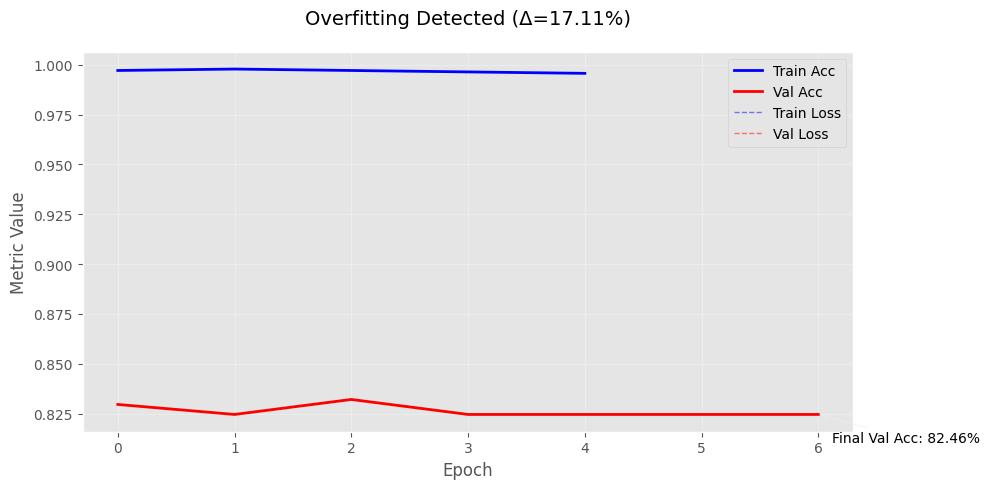

In [ ]:
plt.figure(figsize=(10, 5))

# Gabungkan accuracy dan loss dalam 1 plot
plt.plot(history['train_acc'], 'b-', lw=2, label='Train Acc')
plt.plot(history['val_acc'], 'r-', lw=2, label='Val Acc')
plt.plot(history['train_loss'], 'b--', lw=1, alpha=0.5, label='Train Loss')
plt.plot(history['val_loss'], 'r--', lw=1, alpha=0.5, label='Val Loss')

plt.title(f"Overfitting Detected (Δ={(history['train_acc'][-1]-history['val_acc'][-1]):.2%})",
          fontsize=14, pad=20)
plt.ylabel('Metric Value')
plt.xlabel('Epoch')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True, alpha=0.3)

# Annotate final values
plt.annotate(f"Final Val Acc: {history['val_acc'][-1]:.2%}",
             xy=(len(history['val_acc'])-1, history['val_acc'][-1]),
             xytext=(10, -20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))

plt.tight_layout()
plt.show()